In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [2]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [3]:
df_ames_reg_train = df_ames_train[['Overall Qual','Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add','SalePrice']]

In [4]:
df_ames_reg_train.shape

(2051, 9)

In [5]:
df_ames_reg_train.isna().sum()

Overall Qual      0
Neighborhood      0
Gr Liv Area       0
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
SalePrice         0
dtype: int64

In [6]:
df_ames_reg_train.dropna(inplace=True)

C:\Users\sarah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
df_ames_reg_train.isna().sum()

Overall Qual      0
Neighborhood      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
SalePrice         0
dtype: int64

In [8]:

X = df_ames_reg_train[['Overall Qual','Neighborhood',
'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
'Year Built', 'Year Remod/Add']]
y = df_ames_reg_train['SalePrice']
    

In [9]:
X.shape

(2049, 8)

In [10]:
y.shape

(2049,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
X_train.dtypes

Overall Qual        int64
Neighborhood       object
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
dtype: object

In [13]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Neighborhood', 'Overall Qual']),
    remainder='passthrough',
     verbose_feature_names_out=False)


In [14]:
pipe3 = make_pipeline(ct1, StandardScaler(with_mean=False), LinearRegression())

In [15]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [16]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood',
                                                   'Overall Qual'])],
                                   verbose_feature_names_out=False)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [17]:
preds= pipe3.predict(X_test)

In [18]:
pipe3.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Neighborhood', 'Overall Qual'])],
                   verbose_feature_names_out=False),
 'standardscaler': StandardScaler(with_mean=False),
 'linearregression': LinearRegression()}

In [19]:
cols_p3 = pipe3.named_steps.get('columntransformer').get_feature_names_out()
cols_p3

array(['Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Overall Qual_1',
       'Overall Qual_2', 'Overall Qual_3', 'Overall Qual_4',
       'Overall Qual_5', 'Overall Qual_6', 'Overall Qual_7',
       'Overall Qual_8', 'Overall Qual_9', 'Overall Qual_10',
       'Gr Liv Area', 'Garage Cars', '

In [20]:
pipe3.named_steps['linearregression'].coef_

array([-1549.40429198, -1651.80528304, -2498.77864308,  -120.0938681 ,
        3455.50710755,  -300.89739013,  5049.3072855 , -3905.64109453,
       -1075.89629082,  -930.74689594,  3782.28209737, -2691.75113528,
        -760.92506743, -2312.27782711,  -696.68773995,  -949.66637484,
       -1934.18883361,   248.93078056,  5893.01464761,  6558.13435139,
       -4675.21962033, -1276.49861775, -1429.00054974,  -672.08892735,
         407.5095361 ,  4314.65116007,  1592.23569719,  1384.53611957,
       -1827.7836222 , -2945.68598986, -4077.06934081, -6863.03927105,
       -7855.68116492, -4800.33739027,   309.33215589,  9341.00021086,
       19675.97397767, 10877.00761318, 21239.88161449,  8341.24269473,
        6736.38224708,  1748.29065754,  7270.79922357,  6967.73261498])

In [21]:
pd.DataFrame(zip(cols_p3, 
pipe3.named_steps['linearregression'].coef_))

,0,1
0,Neighborhood_Blmngtn,-1549.404292
1,Neighborhood_Blueste,-1651.805283
2,Neighborhood_BrDale,-2498.778643
3,Neighborhood_BrkSide,-120.093868
4,Neighborhood_ClearCr,3455.507108
5,Neighborhood_CollgCr,-300.897390
6,Neighborhood_Crawfor,5049.307285
7,Neighborhood_Edwards,-3905.641095
8,Neighborhood_Gilbert,-1075.896291
9,Neighborhood_Greens,-930.746896


In [22]:
residuals = preds - y_test
residuals

566    -15478.789417
325    -25150.552555
1486   -16350.194476
543      -181.070701
43       5833.556761
            ...     
1627      676.564279
534     49741.903048
721       428.326042
310    -36282.243077
1986   -38801.413864
Name: SalePrice, Length: 513, dtype: float64

In [23]:
#Evaluate my metrics
print('Linear Regression Model #4 w/Categorical Vars, No Full Bath & More: MAE:', mean_absolute_error(y_test, preds))
print('Linear Regression Model #4 w/Categorical Vars, No Full Bath & More: MSE:', mean_squared_error(y_test, preds))
print('Linear Model #4 w/Categorical Vars, No Full Bath & More: R2:', r2_score(y_test, preds))

Linear Regression Model #4 w/Categorical Vars, No Full Bath & More: MAE: 18791.50623943221
Linear Regression Model #4 w/Categorical Vars, No Full Bath & More: MSE: 798726699.0523268
Linear Model #4 w/Categorical Vars, No Full Bath & More: R2: 0.8786379568166265


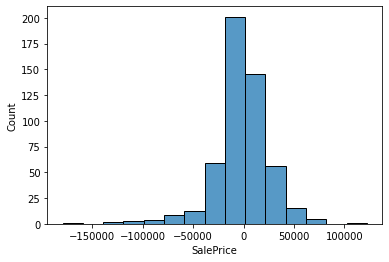

In [24]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

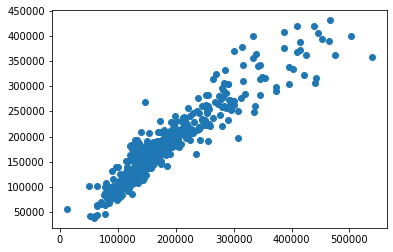

In [25]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

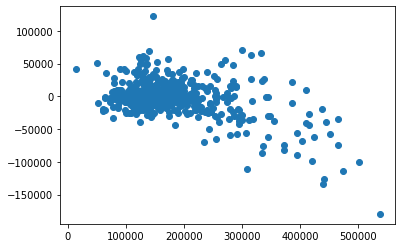

In [26]:
plt.scatter(y_test, residuals);
